# The Birthday Problem

Given a group of $n$ people, what is the probability that at least two people share a birthday?  

### The formula
Let's consider the compliment - given $n$ people, what is the probability that there is **no** shared birthday?  

$$
\begin{align}
P(\text{no shared birthdays}) &= \frac{365}{365} \cdot \frac{364}{365} \cdot \frac{363}{365} \cdot \frac{362}{365} \cdot \ldots \cdot \frac{365 - (n-1)}{365} \\
&= \frac{365!}{(365-n)! \cdot 365^n}
\end{align}
$$

Then, the complimentary probability should be  

$P(\text{at least one pair of shared birthdays}) = 1 - P(\text{no shared birthdays}) = 1 - \frac{365!}{(365-n)! \cdot 365^n}$

In [1]:
from math import factorial

def birthdayMatchProb(n):
    return 1 - (factorial(365))/(factorial(365-n) * 365**n)

### Plotting the results  

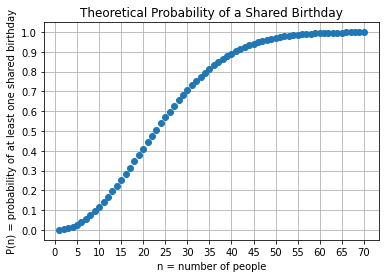

In [2]:
import matplotlib.pyplot as plt

# maximum number of people to be considered
max_N = 70

# build data points
N = [i for i in range(1, max_N + 1)]
P_n = [birthdayMatchProb(n) for n in N]

# set up desired axis values for ticks
xaxis = [5*i for i in range(int(len(N)/5)+1)]
yaxis = [i/10 for i in range(11)]

# instantiate figure and axis; this is only needed to add the axis grid (improved readability)
fig, ax = plt.subplots()
ax.grid()

# plot points as dots with 'o', set our x and y axis values to the string representation of the values
plt.plot(N, P_n, 'o')
plt.xticks(xaxis, map(str, xaxis))
plt.yticks(yaxis, map(str, yaxis))

# axis labels and title
plt.xlabel('n = number of people')
plt.ylabel('P(n) = probability of at least one shared birthday')
plt.title('Theoretical Probability of a Shared Birthday')
plt.show()

### Alternatively, we can run a simulation
Suppose your probability theory isn't that great and you don't know enought to produce the formula above.  We can build a simulation to take random groups of people and see the *experimental probability* of a shared birthday.

In [3]:
from random import choices

# make a list of 365 integers to represent the day of the year
days = [i for i in range(365)]

def sameBirthday(n):
    # randomly choose n days (with replacement) from the 365 possible days to be born
    birthdays = choices(days, k=n)
    
    # determine the number of unique days in the birthdays list using set()
    uniqueBdays = list(set(birthdays))
    
    # if the number of uniques differs from the number of birthdays, there was a match, so return True
    return len(birthdays) != len(uniqueBdays)

The above function will run a single simulation for one group size n.  Now lets run a large number of trials for each group size 1-70 as above, and see that our experimental data matches our theory.

In [4]:
# set the number of trials per group size and the possible group sizes (N = [1, 2, 3, ..., 70])
# you should vary the value for "trials" and see how it impacts the graph below
trials = 50
N = [i for i in range(1, max_N + 1)]

# create an empty list into which we'll stick our experimentally determined probabilities of a match
probs = []

# for each of our 70 group sizes, run *trials* number of trials, track successes, when done add the success rate to probs
for groupSize in N:
    successes = 0
    for i in range(trials):
        if sameBirthday(groupSize):
            successes += 1
    probs.append(successes/trials)

Now that we've collected data, let's just copy our plotting code from above; the only changes were the title and that I called our resulting probabilities *probs* instead of *P_n*.

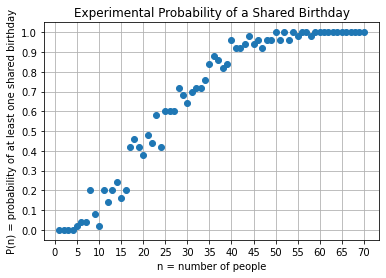

In [5]:
# set up desired axis values for ticks
xaxis = [5*i for i in range(int(len(N)/5)+1)]
yaxis = [i/10 for i in range(11)]

# instantiate figure and axis; this is only needed to add the axis grid (improved readability)
fig, ax = plt.subplots()
ax.grid()

# plot points as dots with 'o', set our x and y axis values to the string representation of the values
plt.plot(N, probs, 'o')
plt.xticks(xaxis, map(str, xaxis))
plt.yticks(yaxis, map(str, yaxis))

# axis labels and title
plt.xlabel('n = number of people')
plt.ylabel('P(n) = probability of at least one shared birthday')
plt.title('Experimental Probability of a Shared Birthday')
plt.show()

Now go back and change the number of trials to let the Law of Large Numbers take effect.